<a href="https://colab.research.google.com/github/vajihe-ameri/predict-software-bugs-in-java-classes/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=330d95ce256cd23fb46e41514ab84a0e7700217c892b628b9c4837fed2ef7a8a
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [1]:
import pandas as pd
from google.colab import drive 
drive = drive.mount('/content/drive') 

Mounted at /content/drive


In [5]:
!pip install tensorflow-addons
import tensorflow_addons
f_measure = tensorflow_addons.metrics.F1Score(num_classes=3, average='micro', threshold=0.5)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
test_features = pd.read_csv("/content/drive/MyDrive/new_df/test_set.csv")
train_features = pd.read_csv("/content/drive/MyDrive/new_df/train_set.csv")
test_target = pd.read_csv("/content/drive/MyDrive/new_df/test_set_NB.csv")
train_target = pd.read_csv("/content/drive/MyDrive/new_df/train_set_NB.csv")

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
model = Sequential()

model.add(Dense(60, kernel_initializer = 'uniform', activation = 'relu', input_dim = train_features.shape[1]))
model.add( Dense(50, kernel_initializer = 'uniform', activation = 'relu'))
model.add( Dense(20, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(3, kernel_initializer = 'uniform', activation = 'softmax'))

In [18]:
model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 60)                5100      
                                                                 
 dense_4 (Dense)             (None, 50)                3050      
                                                                 
 dense_5 (Dense)             (None, 20)                1020      
                                                                 
 dense_6 (Dense)             (None, 3)                 63        
                                                                 
Total params: 9,233
Trainable params: 9,233
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(train_features, train_target['Number of Bugs'], batch_size = 128, epochs = 1000,  validation_split=0.2)

Epoch 1/1000
154/154 [==============================] - 1s 4ms/step - loss: 1.0485 - accuracy: 0.4111 - val_loss: 1.9159 - val_accuracy: 0.0000e+00
Epoch 2/1000
154/154 [==============================] - 0s 2ms/step - loss: 1.0194 - accuracy: 0.4188 - val_loss: 1.6748 - val_accuracy: 0.0000e+00
Epoch 3/1000
154/154 [==============================] - 0s 2ms/step - loss: 1.0154 - accuracy: 0.4381 - val_loss: 1.7235 - val_accuracy: 0.0000e+00
Epoch 4/1000
154/154 [==============================] - 0s 2ms/step - loss: 1.0125 - accuracy: 0.4479 - val_loss: 1.7412 - val_accuracy: 0.0000e+00
Epoch 5/1000
154/154 [==============================] - 0s 2ms/step - loss: 1.0100 - accuracy: 0.4509 - val_loss: 1.7645 - val_accuracy: 0.0000e+00
Epoch 6/1000
154/154 [==============================] - 0s 2ms/step - loss: 1.0079 - accuracy: 0.4558 - val_loss: 1.6567 - val_accuracy: 0.0000e+00
Epoch 7/1000
154/154 [==============================] - 0s 2ms/step - loss: 1.0063 - accuracy: 0.4536 - val_loss

In [21]:
import matplotlib.pyplot as plt

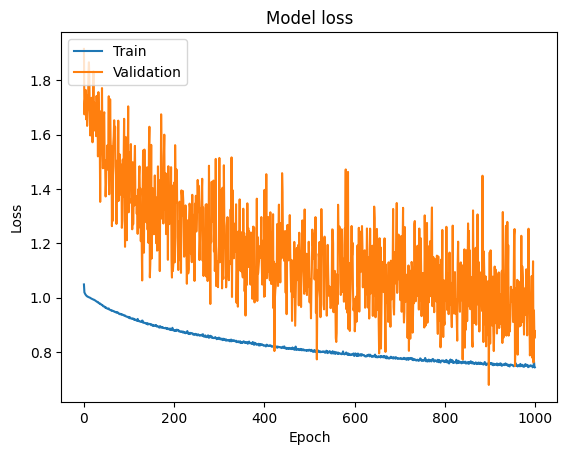

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

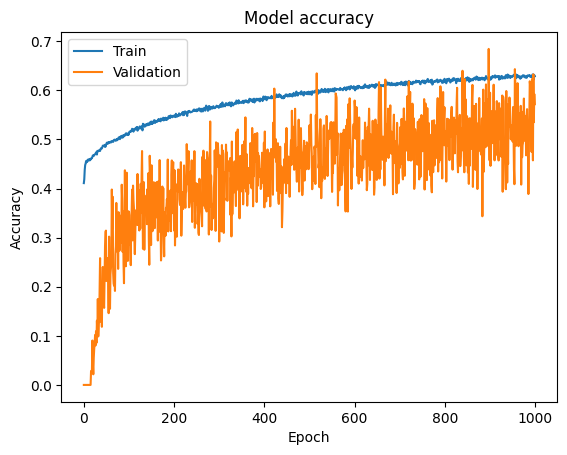

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()



*********************************************
Test-set evaluate result:

131/131 [==============================] - 0s 1ms/step - loss: 1.3563 - accuracy: 0.4244
[1.3562922477722168, 0.4244311451911926]
131/131 [==============================] - 0s 1000us/step
Report for test set:

               precision    recall  f1-score   support

     class 0       0.52      0.55      0.53      2042
     class 1       0.28      0.28      0.28      1327
     class 2       0.42      0.36      0.38       806

    accuracy                           0.42      4175
   macro avg       0.40      0.39      0.40      4175
weighted avg       0.42      0.42      0.42      4175



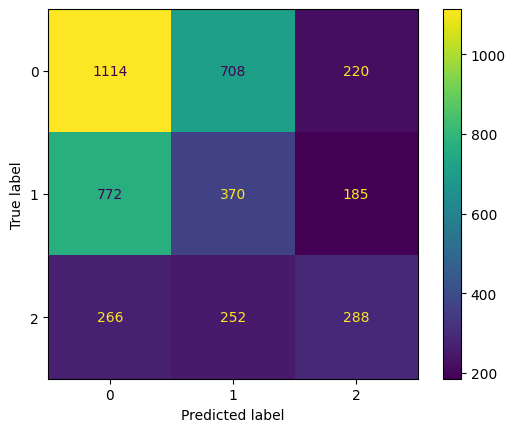



*********************************************
Train-set evaluate result:

766/766 [==============================] - 1s 1ms/step - loss: 0.7593 - accuracy: 0.6241
[0.7592646479606628, 0.624122142791748]
766/766 [==============================] - 1s 963us/step
Report for train set:

               precision    recall  f1-score   support

     class 0       0.55      0.70      0.61      8164
     class 1       0.59      0.59      0.59      8164
     class 2       0.82      0.58      0.68      8164

    accuracy                           0.62     24492
   macro avg       0.65      0.62      0.63     24492
weighted avg       0.65      0.62      0.63     24492



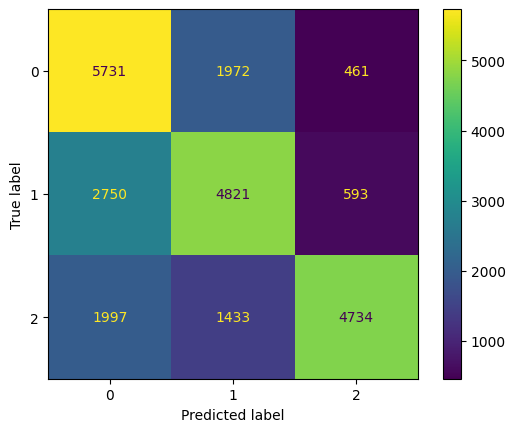

In [24]:
import numpy
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
target_names = ['class 0', 'class 1', 'class 2']

print("\n\n*********************************************\nTest-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction = numpy.argmax(test_prediction_points, axis=1)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction = numpy.argmax(train_prediction_points, axis=1)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix)
train_disp.plot()
plt.show()

In [25]:
test_loss, test_accuracy = model.evaluate(test_features, test_target)

131/131 [==============================] - 0s 1ms/step - loss: 1.3563 - accuracy: 0.4244
